In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
 
# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# to make this notebook's output stable across runs
np.random.seed(42)
 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reading Data & PreProcessing

In [ ]:
#Reading The Data File
PATH_TO_DATA = '/content/drive/MyDrive/Colab Notebooks/house prices.csv'
df = pd.read_csv(PATH_TO_DATA)

n1,n2=df.shape
df=df.dropna(thresh=0.7*n1,axis='columns') # Keep only the columns with at least 0.7*n1 non-NA values.
#For Object columns
cat_columns = df.select_dtypes(['O']).columns
for cat in cat_columns: 
  df[cat] = df[cat].astype('category')
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df=df.fillna(df.mean())
#For numeric columns
df=df.fillna(df.mean())
cat1_columns = df.select_dtypes(['int64']).columns
for cat1 in cat1_columns: 
  df[cat1] = df[cat1].astype('float64')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,2.0,20.0,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,3.0,60.0,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,4.0,70.0,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,5.0,60.0,3,84.0,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3,62.0,7917.0,1,3,3,0,4,0,8,2,2,0,5,6.0,5.0,1999.0,2000.0,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0.0,5,0.0,953.0,953.0,1,0,1,4,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3,7.0,6,1.0,1,1999.0,1,2.0,460.0,4,4,2,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8,4,175000.0
1456,1457.0,20.0,3,85.0,13175.0,1,3,3,0,4,0,14,2,2,0,2,6.0,6.0,1978.0,1988.0,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790.0,4,163.0,589.0,1542.0,1,4,1,4,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3,7.0,2,2.0,1,1978.0,2,2.0,500.0,4,4,2,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8,4,210000.0
1457,1458.0,70.0,3,66.0,9042.0,1,3,3,0,4,0,6,2,2,0,5,7.0,9.0,1941.0,2006.0,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275.0,5,0.0,877.0,1152.0,1,0,1,4,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,2,9.0,6,2.0,1,1941.0,1,1.0,252.0,4,4,2,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8,4,266500.0
1458,1459.0,20.0,3,68.0,9717.0,1,3,3,0,4,0,12,2,2,0,2,5.0,6.0,1950.0,1996.0,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49.0,4,1029.0,0.0,1078.0,1,2,1,0,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,2,5.0,6,0.0,1,1950.0,2,1.0,240.0,4,4,2,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8,4,142125.0


In [ ]:
Data=df.values #Pandas to Numpy
y=df['SalePrice']
X=df.drop(columns='SalePrice')

#Correlation Matrix

Text(0.5, 1.0, 'Corr Matrix')

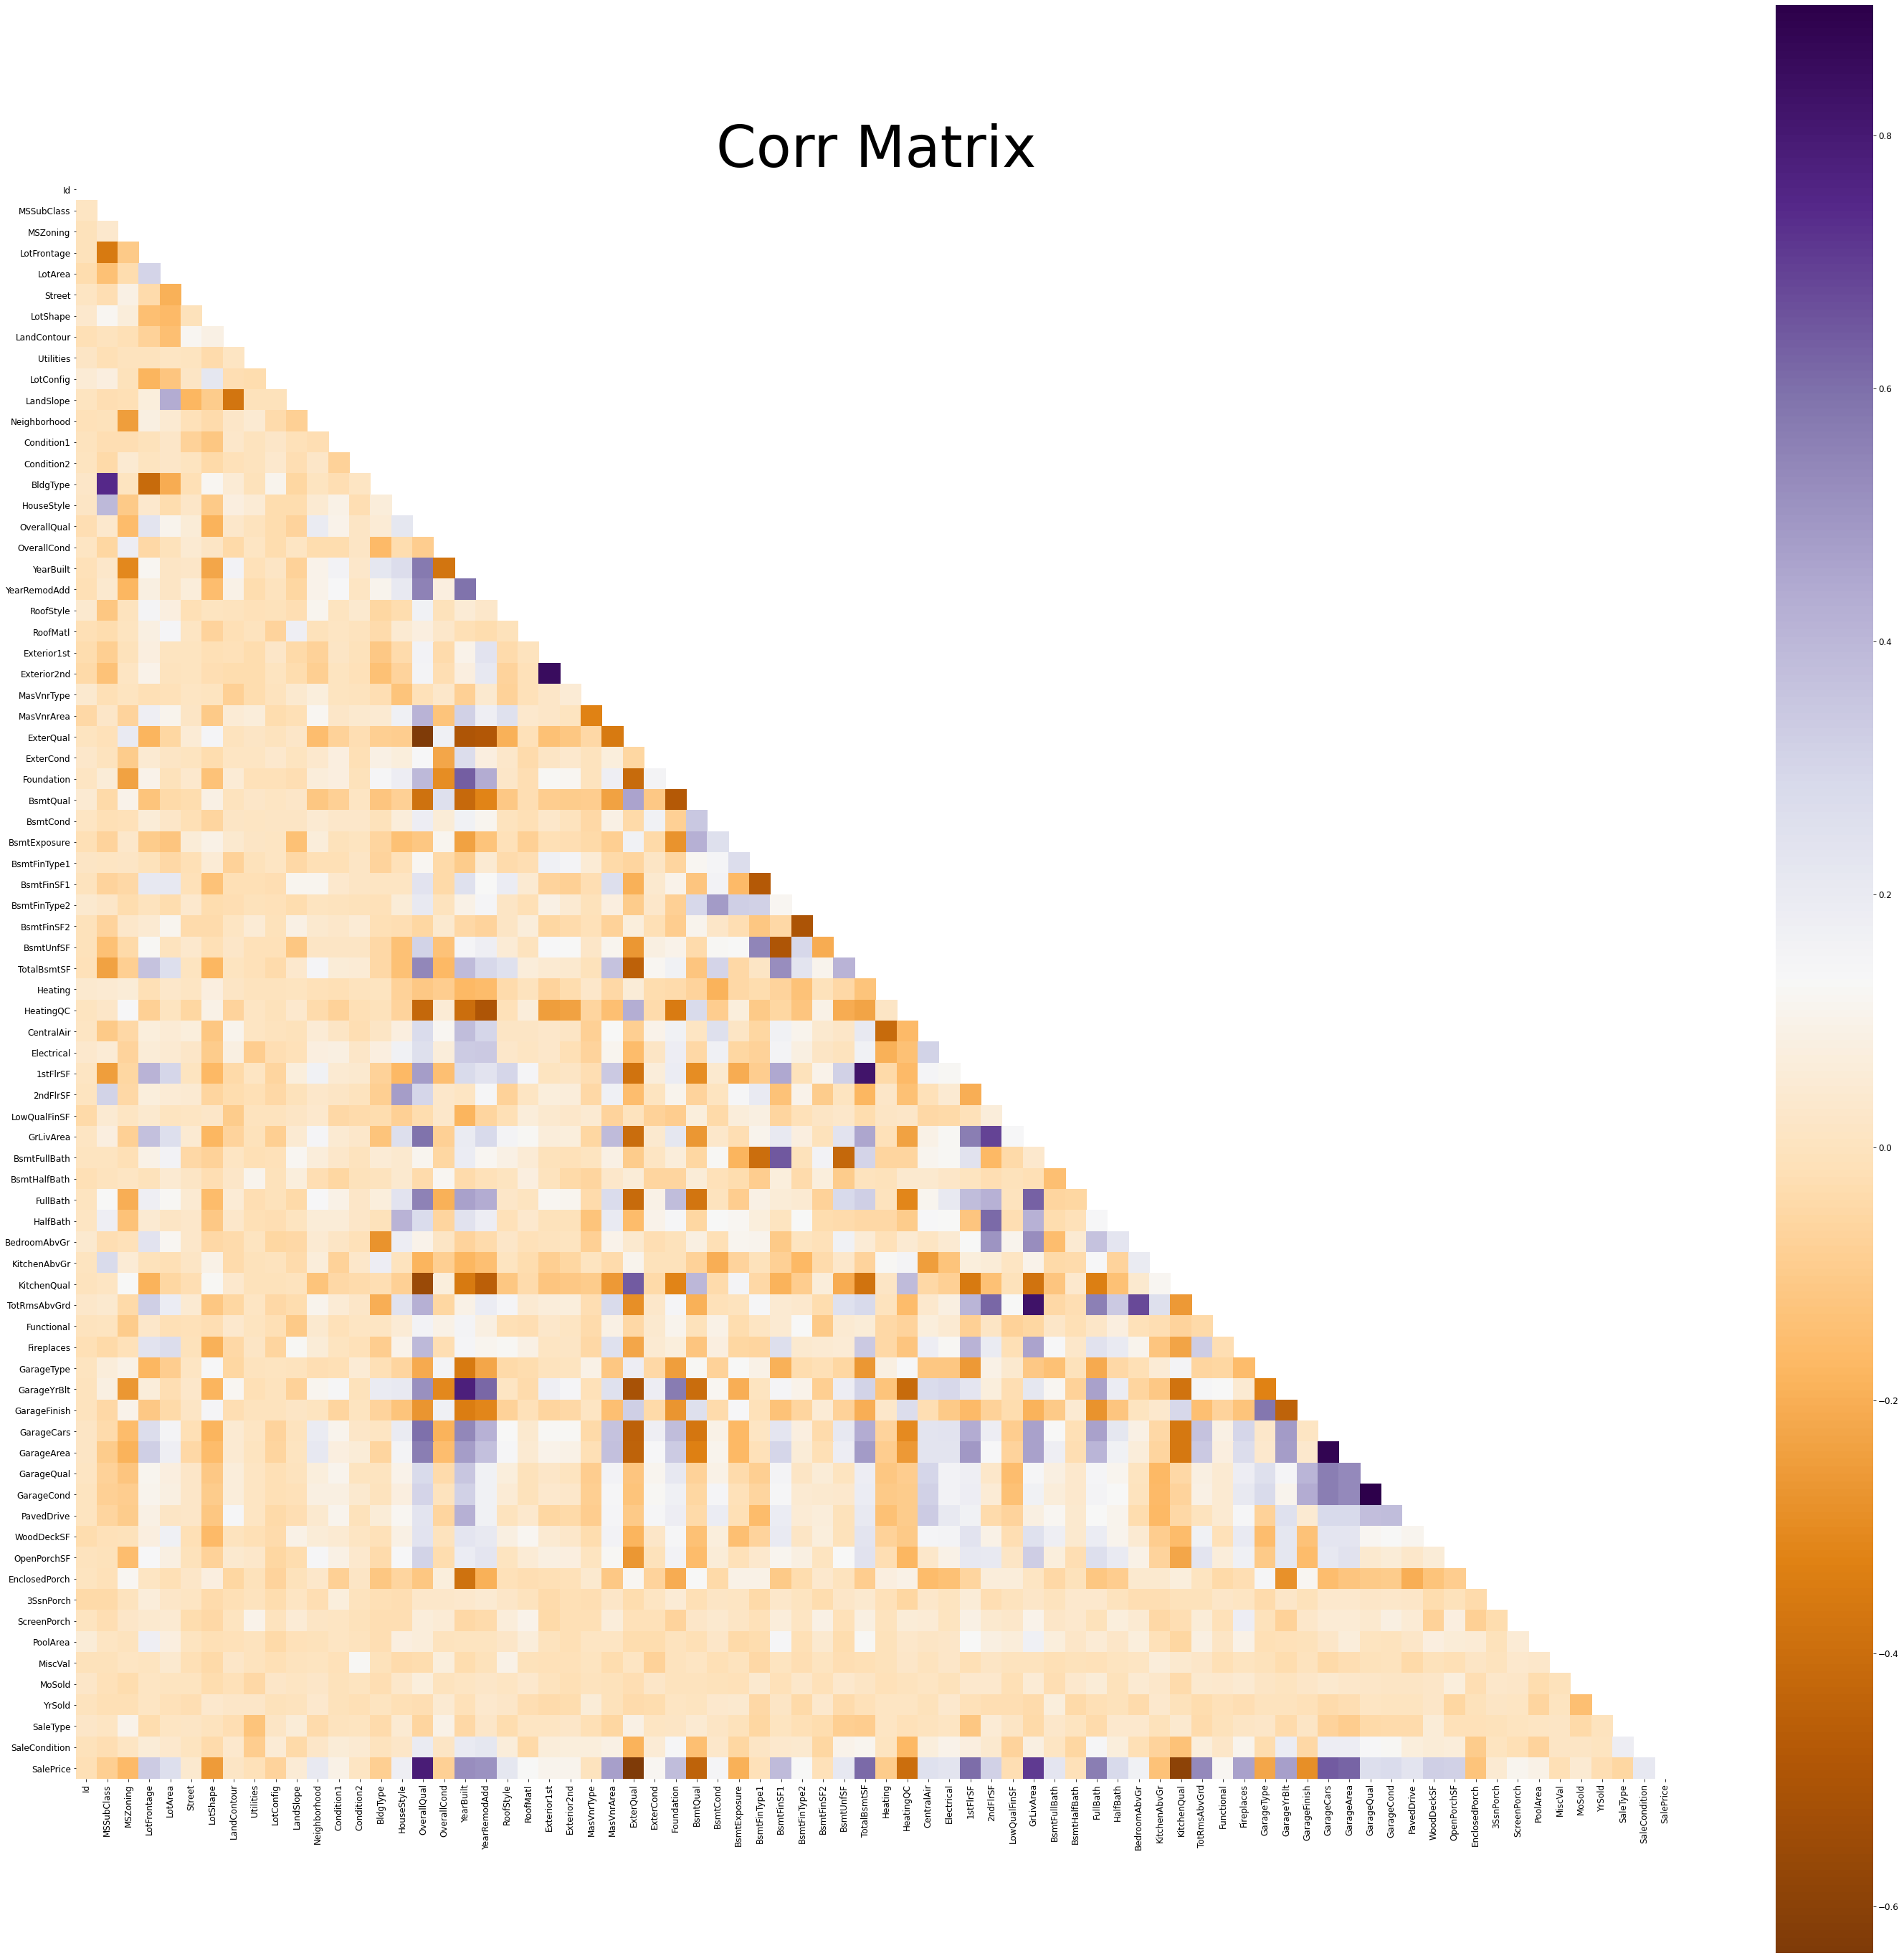

In [ ]:
# %%time
# import time
# start=time.time()
import seaborn as sn
corrMatrix = df.corr()
plt.figure(figsize=(50,50))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sn.heatmap(corrMatrix, mask=mask, square=True, cmap='PuOr')
plt.title('Corr Matrix',fontsize= 80)

# Part b
#1) Linear Regression Model

In [ ]:
# Liner Regression                                                
from sklearn.linear_model import LinearRegression
#Preprocessing Data
# df1=pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns, index=df.index)
# y=df1['SalePrice']
# X=df1.drop(columns='SalePrice')

regressor = LinearRegression()  #normalize=True
regressor.fit(X, y)
predictions =  regressor.predict(X)
#Accuracy Evaluating
mae = 0
for i in range(0, len(predictions)):
    prediction = predictions[i]
    actual = y.iloc[i]
 
    error = abs(actual - prediction)
    mae = mae + error
 
mae = mae / len(predictions)
#print(mae)
intercept = regressor.intercept_
features = pd.DataFrame(regressor.coef_, X.columns, columns=['coefficient']).abs()
stdevs = []
for i in X.columns:
    stdev = df[i].std()
    stdevs.append(stdev)
print(stdevs) 
# Comparing Features
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]

#plt.barh(features.index, features.importance_normalized)
features['importance_normalized'] = 100*features['importance'] / features['importance'].max()

[421.6100093688479, 42.30057099381035, 0.6320174410566584, 22.024022688706943, 9981.264932379147, 0.06399613628755288, 1.4091561752733253, 0.707665901269637, 0.02617119612951068, 1.6226344122162735, 0.27623246434908894, 6.013734979461894, 0.8685151095392345, 0.2590399444998388, 1.198277123627841, 1.9113047147632327, 1.3829965467415923, 1.1127993367127367, 30.202904042525265, 20.645406807709396, 0.8349977900554615, 0.599126808506423, 3.197659391675856, 3.5405702977318376, 0.6469866580961755, 180.5691124259736, 0.6939945515402004, 0.7318072118905032, 0.7223936283579793, 0.9984023498096825, 0.8843462640610036, 1.2461383730658087, 1.8957273271304562, 456.09809084092456, 1.2963320832506144, 161.31927280654057, 441.8669552924342, 438.7053244594705, 0.2951237555930152, 1.7395240253234598, 0.24673119063521748, 1.058385291293552, 386.5877380410738, 436.5284358862591, 48.623081433519125, 525.4803834232027, 0.5189106060897992, 0.23875264627920764, 0.5509158012954318, 0.5028853810928973, 0.8157780

In [ ]:
features

,coefficient,stdev,importance,importance_normalized
Id,1.781011,421.610009,750.891960,4.772882
MSSubClass,111.487924,42.300571,4716.002830,29.976248
MSZoning,1694.530872,0.632017,1070.973066,6.807408
LotFrontage,151.731077,22.024023,3341.728672,21.240973
LotArea,0.361071,9981.264932,3603.949410,22.907722
...,...,...,...,...
MiscVal,0.476662,496.123024,236.483166,1.503154
MoSold,141.764929,2.703626,383.279378,2.436232
YrSold,1087.060476,1.328095,1443.719713,9.176691
SaleType,546.557853,1.552100,848.312529,5.392114


# Visualising Regression model Feature Importances


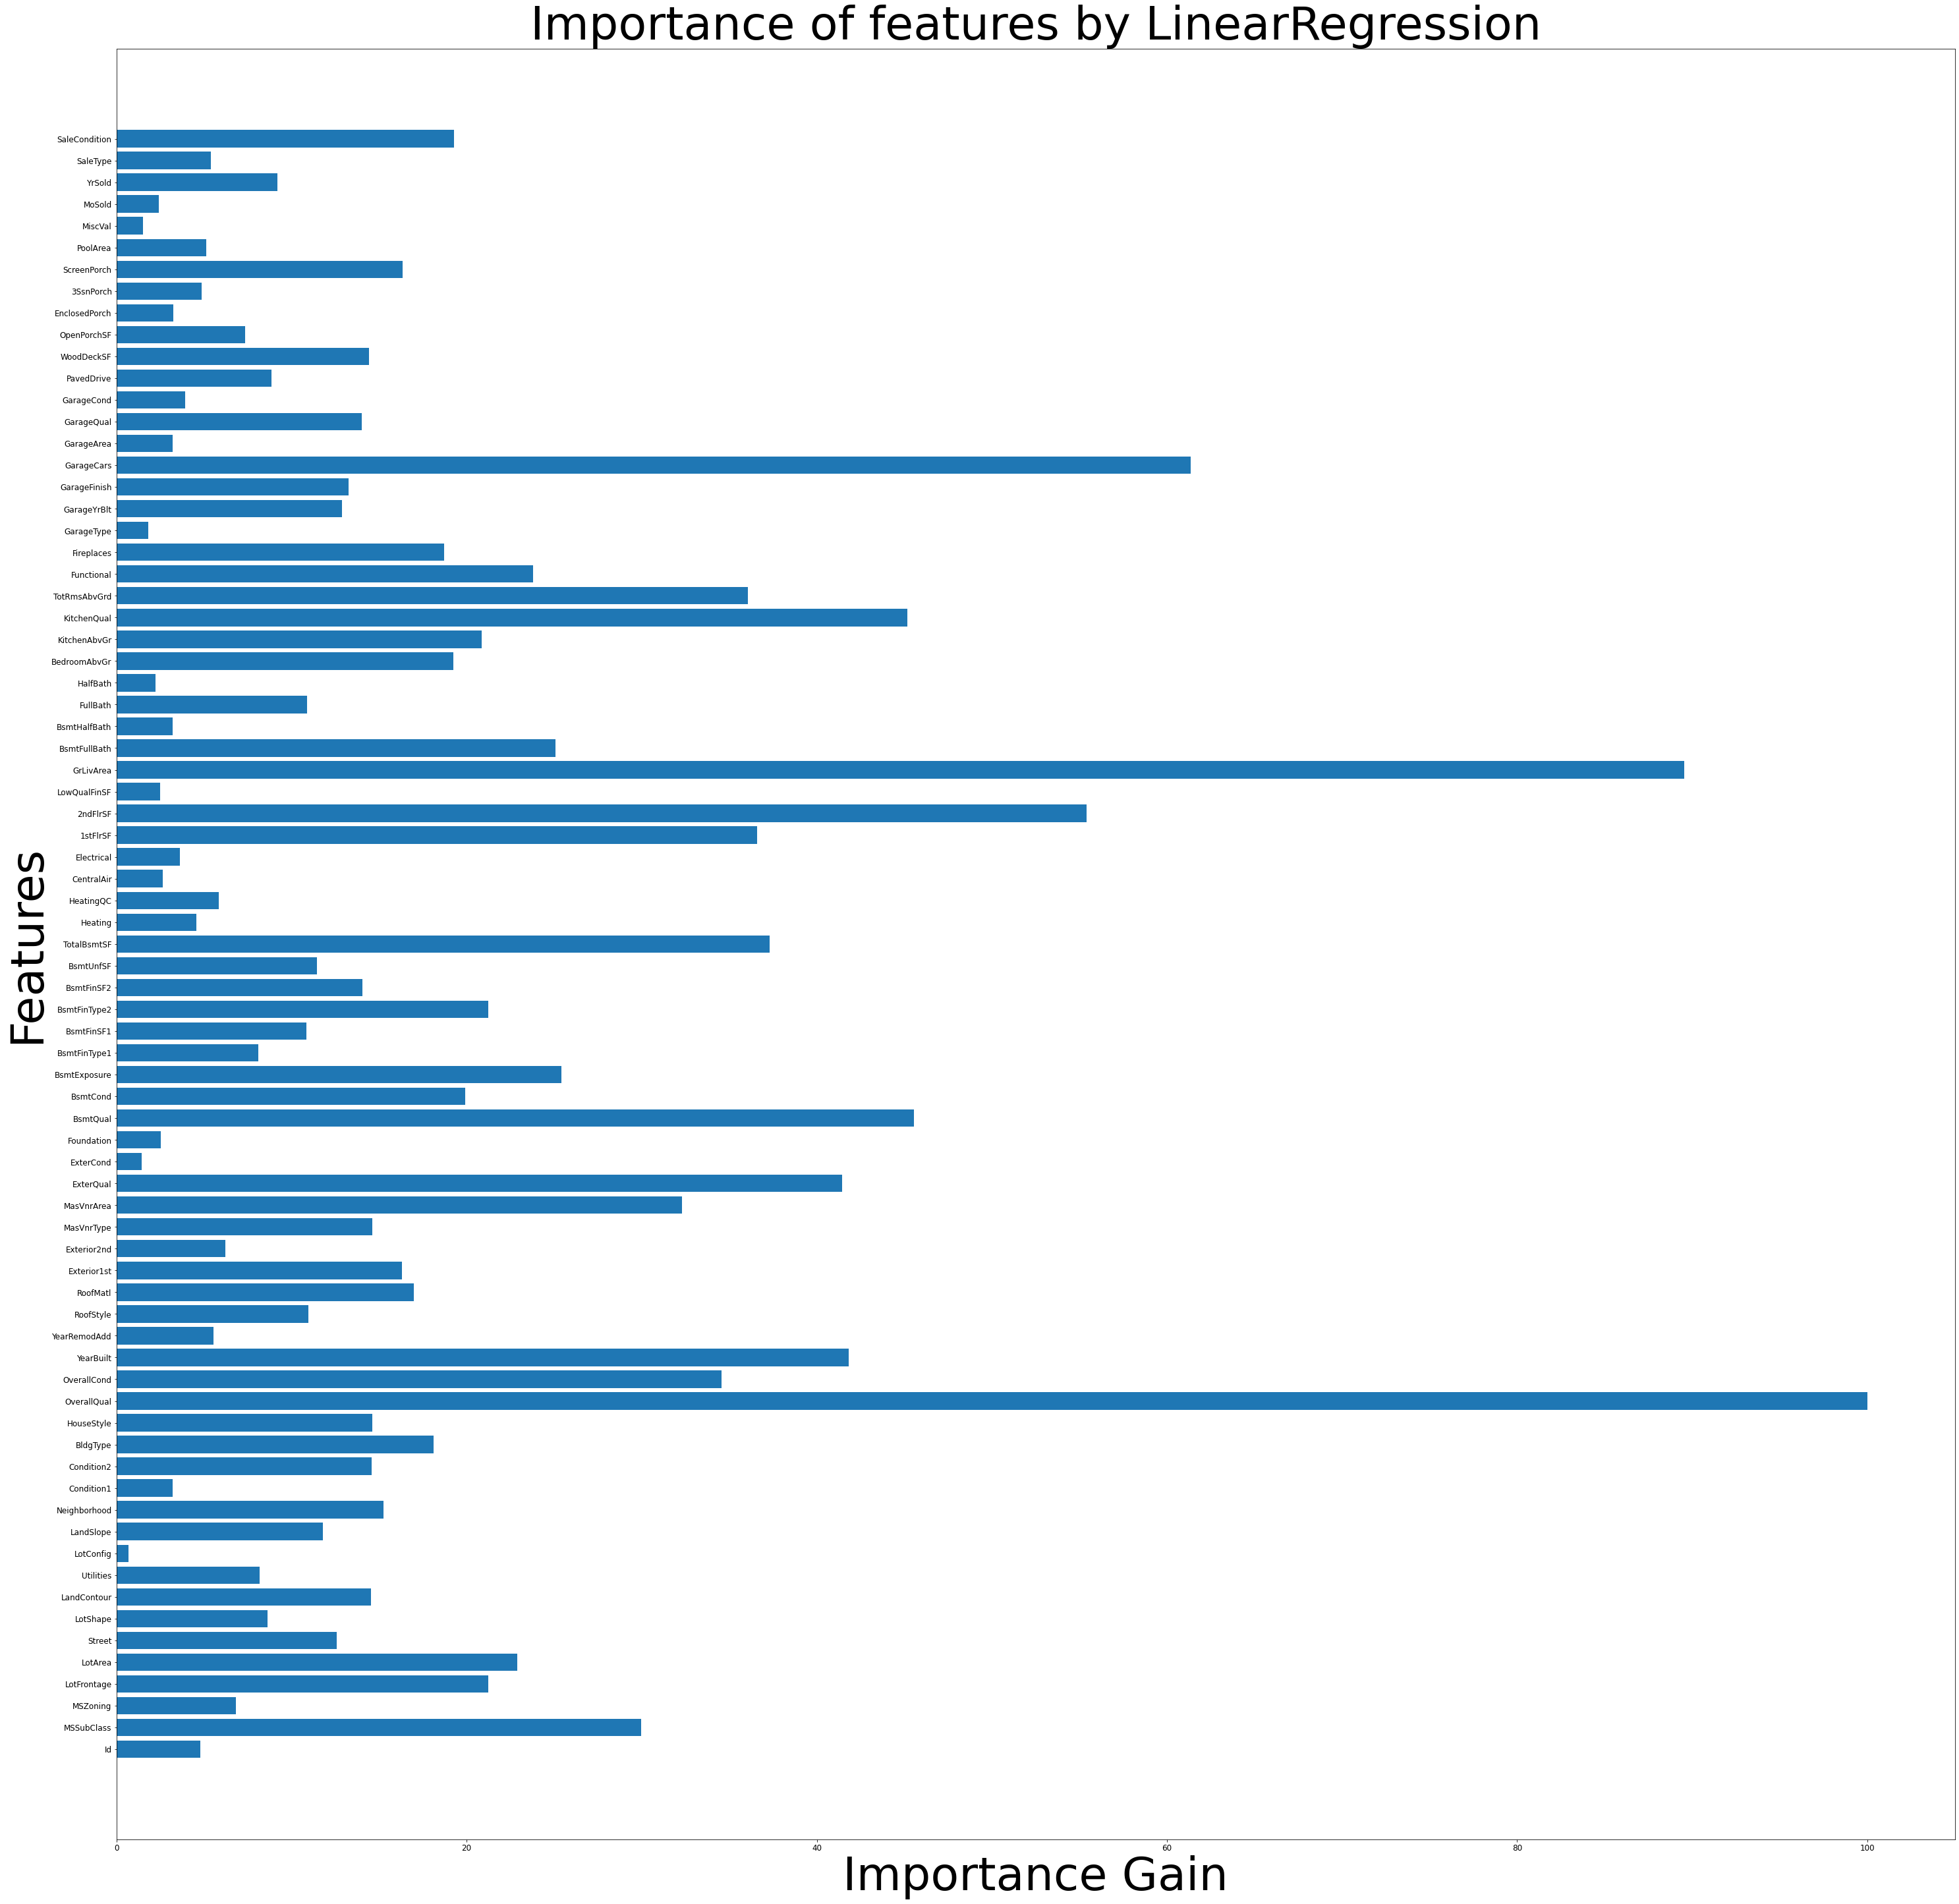

In [ ]:
plt.figure(figsize=(50,50))
plt.barh(features.index, features.importance_normalized)  # How to show only some of them?
plt.title('Importance of features by LinearRegression',fontsize=70)
plt.ylabel('Features',fontsize=70)
plt.xlabel('Importance Gain',fontsize=70)
plt.show()

# Decision tree Importance of Features


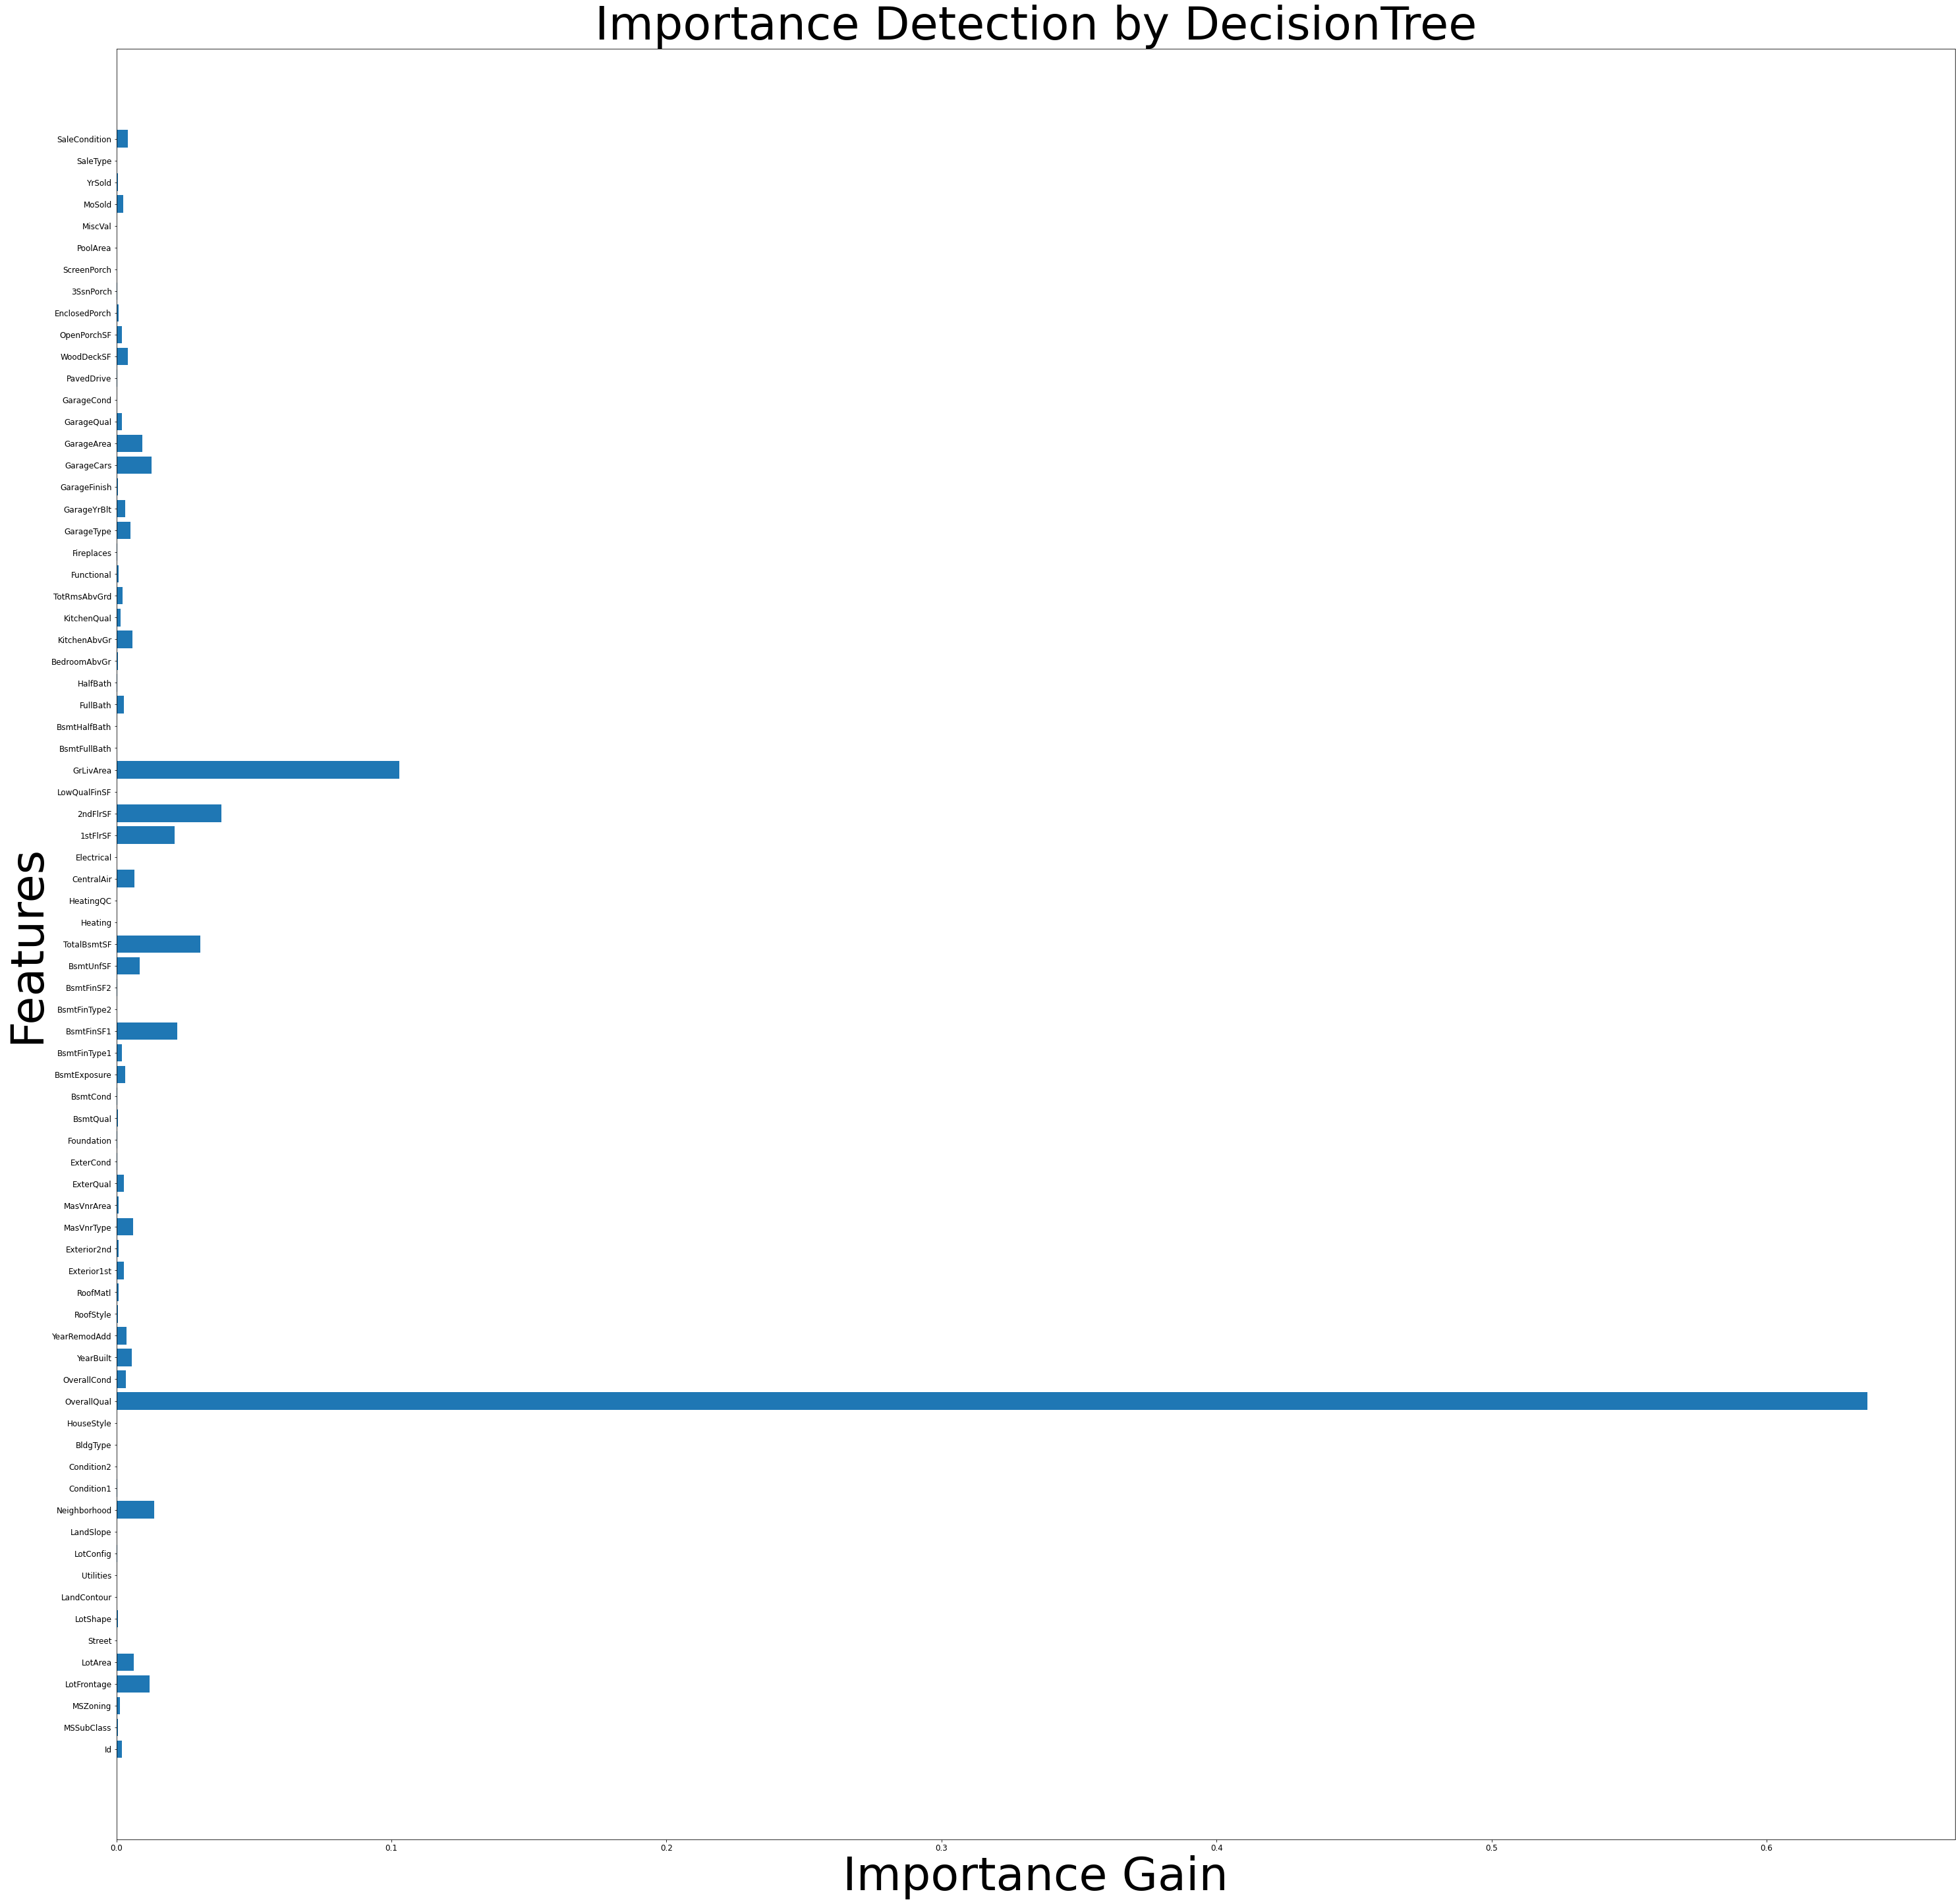

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
final_d_tree = DecisionTreeRegressor(random_state=0)
#scores=cross_val_score(final_d_tree, X, y, cv=5)
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
final_d_tree.fit(X,y)
predict=final_d_tree.predict(X)

final_d_tree.feature_importances_
df1=pd.DataFrame({'Feature_names':X.columns,'Importances':final_d_tree.feature_importances_})
#df1=df1.sort_values(by='Importances',ascending=False)
plt.figure(figsize=(50,50))
plt.barh(df1['Feature_names'],df1['Importances'])
plt.title('Importance Detection by DecisionTree',fontsize=70)
plt.ylabel('Features', fontsize=70)
plt.xlabel('Importance Gain',fontsize=70)
plt.show()

# Backward elimination

In [ ]:
import statsmodels.api as sm
import time
#counter=0
def backward_elimination(data, target,significance_level = 0.05):
    counter=0
    features = data.columns.tolist()
    while(len(features)>0):
        counter=counter+1
        start=time.time()
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
        end = time.time()
        ttt=end-start
        print("Step",counter, "Execution Time is : %0.3f seconds ---" %ttt,excluded_feature)    
    return features

from sklearn import preprocessing
# Get column names first
names = df.columns

# Create the Scaler object
X=df.values[:,:-1]
y=df.values[:,-1]
xScaler1 = MinMaxScaler().fit(X);        #This has changed
yScaler1 = MinMaxScaler().fit(y.reshape(-1, 1));   #This has changed
X = xScaler1.transform(X)
y = yScaler1.transform(y.reshape(-1, 1))
Xy=np.concatenate((X,y), axis=1)
scaled_df= pd.DataFrame(Xy, columns=names)
y=scaled_df['SalePrice']
X=scaled_df.drop(columns='SalePrice')


Features_list=backward_elimination(X,y)
print('significant Features are  ,',Features_list)    


#Storing The new Dataset
#df_new= pd.DataFrame(df, columns=names)
df_new = df.filter(Features_list, axis=1)
ID_list=np.arange(1460)
df_new.insert(0, "Id", ID_list, True)
df_new

Step 1 Execution Time is : 0.025 seconds --- LowQualFinSF
Step 2 Execution Time is : 0.029 seconds --- LotConfig
Step 3 Execution Time is : 0.029 seconds --- BsmtUnfSF
Step 4 Execution Time is : 0.052 seconds --- GarageArea
Step 5 Execution Time is : 0.027 seconds --- ExterCond
Step 6 Execution Time is : 0.028 seconds --- GarageType
Step 7 Execution Time is : 0.026 seconds --- GarageCond
Step 8 Execution Time is : 0.027 seconds --- MiscVal
Step 9 Execution Time is : 0.026 seconds --- Foundation
Step 10 Execution Time is : 0.036 seconds --- HalfBath
Step 11 Execution Time is : 0.040 seconds --- CentralAir
Step 12 Execution Time is : 0.025 seconds --- MoSold
Step 13 Execution Time is : 0.025 seconds --- BsmtHalfBath
Step 14 Execution Time is : 0.029 seconds --- Electrical
Step 15 Execution Time is : 0.024 seconds --- YearRemodAdd
Step 16 Execution Time is : 0.024 seconds --- Exterior2nd
Step 17 Execution Time is : 0.023 seconds --- EnclosedPorch
Step 18 Execution Time is : 0.024 seconds 

,Id,MSSubClass,LotFrontage,LotArea,Street,LandContour,LandSlope,Neighborhood,Condition2,OverallQual,OverallCond,YearBuilt,RoofMatl,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,1stFlrSF,2ndFlrSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,SaleCondition
0,0,60.0,65.0,8450.0,1,3,0,5,2,7.0,5.0,2003.0,1,1,196.0,2,2,3,3,706.0,5,0.0,856.0,854.0,1.0,3.0,1.0,2,8.0,6,0.0,2.0,4,0.0,0.0,4
1,1,20.0,80.0,9600.0,1,3,0,24,2,6.0,8.0,1976.0,1,2,0.0,3,2,3,1,978.0,5,0.0,1262.0,0.0,0.0,3.0,1.0,3,6.0,6,1.0,2.0,4,298.0,0.0,4
2,2,60.0,68.0,11250.0,1,3,0,5,2,7.0,5.0,2001.0,1,1,162.0,2,2,3,2,486.0,5,0.0,920.0,866.0,1.0,3.0,1.0,2,6.0,6,1.0,2.0,4,0.0,0.0,4
3,3,70.0,60.0,9550.0,1,3,0,6,2,7.0,5.0,1915.0,1,2,0.0,3,3,1,3,216.0,5,0.0,961.0,756.0,1.0,3.0,1.0,2,7.0,6,1.0,3.0,4,0.0,0.0,0
4,4,60.0,84.0,14260.0,1,3,0,15,2,8.0,5.0,2000.0,1,1,350.0,2,2,3,0,655.0,5,0.0,1145.0,1053.0,1.0,4.0,1.0,2,9.0,6,1.0,3.0,4,192.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60.0,62.0,7917.0,1,3,0,8,2,6.0,5.0,1999.0,1,2,0.0,3,2,3,3,0.0,5,0.0,953.0,694.0,0.0,3.0,1.0,3,7.0,6,1.0,2.0,4,0.0,0.0,4
1456,1456,20.0,85.0,13175.0,1,3,0,14,2,6.0,6.0,1978.0,1,3,119.0,3,2,3,3,790.0,4,163.0,2073.0,0.0,1.0,3.0,1.0,3,7.0,2,2.0,2.0,4,349.0,0.0,4
1457,1457,70.0,66.0,9042.0,1,3,0,6,2,7.0,9.0,1941.0,1,2,0.0,0,3,1,3,275.0,5,0.0,1188.0,1152.0,0.0,4.0,1.0,2,9.0,6,2.0,1.0,4,0.0,0.0,4
1458,1458,20.0,68.0,9717.0,1,3,0,12,2,5.0,6.0,1950.0,1,2,0.0,3,3,3,2,49.0,4,1029.0,1078.0,0.0,1.0,2.0,1.0,2,5.0,6,0.0,1.0,4,366.0,0.0,4


In [ ]:
Data1=df_new.values  ##Chaaaaaaaaaaaaaanged
y=df.values[:,-1]
print(y)
X=Data1
#Spliting the Data to Train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

#Normalising The data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
#Normalising The data
xScaler = MinMaxScaler().fit(X);        #This has changed
yScaler = MinMaxScaler().fit(y.reshape(-1, 1));   #This has changed
X_train = xScaler.transform(X_train)
X_test  = xScaler.transform(X_test)
y_train = yScaler.transform(y_train.reshape(-1, 1))
y_test  = yScaler.transform(y_test.reshape(-1, 1))



from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Dropout
from keras import layers

(dim1,dim2)=X_train.shape
dim2=dim2-1 #Removing ID
#Model Creation
model = Sequential()
model.add(layers.Dense(dim2, activation='relu', input_shape=(dim2,)))	#Hidden Layer 1
model.add(layers.Dropout(.3))
model.add(layers.Dense(512, activation='relu'))	#Hidden Layer 2
model.add(layers.Dropout(.3))
#model.add(layers.Dense(256, activation='relu'))	#Hidden Layer 3
model.add(layers.Dense(1, activation='sigmoid')) #Last layer with one output
model.summary()

opt='adam'
model.compile(loss='mae', optimizer=opt, metrics=['mse','mae']) #change loss='mae'

[208500. 181500. 223500. ... 266500. 142125. 147500.]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 35)                1260      
_________________________________________________________________
dropout_14 (Dropout)         (None, 35)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 513       
Total params: 20,205
Trainable params: 20,205
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
32/32 [==============================] - 0s 6ms/step - loss: 0.0196 - mse: 8.2364e-04 - mae: 0.0196 - val_loss: 0.0367 - val_mse: 0.0024 - val_mae: 0.0367
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.0193 - mse: 8.0068e-04 - mae: 0.0193 - val_loss: 0.0438 - val_mse: 0.0030 - val_mae: 0.0438
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.0215 - mse: 0.0014 - mae: 0.0215 - val_loss: 0.0422 - val_mse: 0.0029 - val_mae: 0.0422
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0200 - mse: 9.9710e-04 - mae: 0.0200 - val_loss: 0.0406 - val_mse: 0.0026 - val_mae: 0.0406
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0209 - mse: 0.0010 - mae: 0.0209 - val_loss: 0.0322 - val_mse: 0.0021 - val_mae: 0.0322
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0216 - mse: 0.0013 - mae: 0.0216 - val_loss: 0.0365 - val_mse: 0.0024 - val_mae: 0.0365
Epoch 7/30
32/32

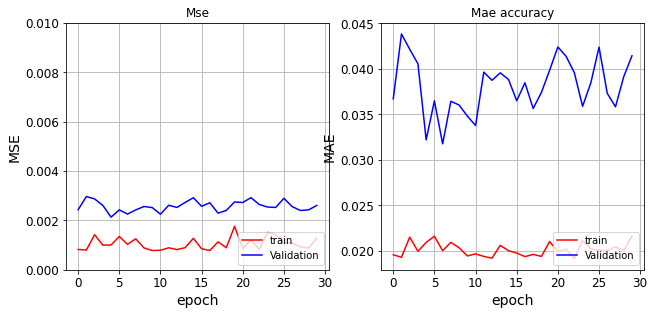

In [ ]:
##Modaat zamane amooozesh
start1=time.time()
history = model.fit(X_train[:,1:], y_train, epochs=30 ,batch_size=30,validation_split=0.2)   #this has changed
end1=time.time() 
tt=end1-start1
print("Training Time is %s seconds"%tt)
 
# Plotting Metrics
# Plot the Accuracy Curves
#MSe
fig = plt.figure(figsize=(16,10))
plt.subplot(231)
plt.plot(history.history['mse'],'r')
plt.plot(history.history['val_mse'],'b')
plt.title('Mse')
plt.ylim([0,0.01])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='lower right')
plt.grid()
 
#MAe
# fig = plt.figure()
plt.subplot(232)
plt.plot(history.history['mae'],'r')
plt.plot(history.history['val_mae'],'b')
plt.title('Mae accuracy')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='lower right')
plt.grid()


10/10 [==============================] - 0s 1ms/step - loss: 0.0364 - mse: 0.0024 - mae: 0.0364


[0.03638136759400368, 0.0023759091272950172, 0.03638136759400368]

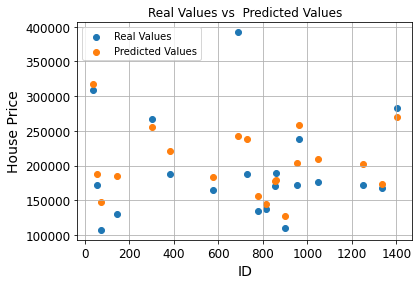

In [ ]:
# Prediction Labels
y_pred=model.predict(X_test[:,1:])   #This has changed
yPredict=yScaler.inverse_transform(y_pred).reshape(-1, 1)
yTest=yScaler.inverse_transform(y_test)
yTest=yTest.reshape(-1, 1)
XTest=xScaler.inverse_transform(X_test)

Real_test=np.concatenate((XTest[:,0].reshape(-1, 1),yTest,yPredict),axis=1)
#Real_test=Real_test[Real_test[:,0].argsort()]
number_of_rows=20
size1=20
random_indices = np.random.choice(number_of_rows, size1, replace=False)
final=Real_test[random_indices,:]
final=final[final[:,0].argsort()]

# Plot the  test
fig = plt.figure()
# plt.plot(final[:,0],final[:,1],'r')
# plt.plot(final[:,0],final[:,2],'b-')
plt.scatter(final[:,0],final[:,1])
plt.scatter(final[:,0],final[:,2])
plt.title('Real Values vs  Predicted Values')
plt.ylabel('House Price')
plt.xlabel('ID')
plt.legend(['Real Values', 'Predicted Values'], loc='upper left')
plt.grid()


#Evaluation
model.evaluate(X_test[:,1:], y_test) 